### Visulising initial state fidelity distance on the Bloch sphere

In [2]:
from boson_data_lib import *
from qutip import *
import numpy as np
import scipy.linalg as sl

import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import seaborn as sns

In [3]:
def get_init_states():
    
    init_rho = []
    fidelity_distances = []
    
    #best_init_rho =  np.array([[ 0.96693975+0.j        , -0.17832301+0.00560344j],
    #                          [-0.17832301-0.00560344j,  0.03306025+0.j        ]])

    #best_init_rho =  np.array([[ 1.0+0.j,  0.0+0.0j],
    #                           [ 0.0-0.0j, 0.0+0.0j] ]) # ground state
    
    best_init_rho =  np.array([[ 0.0+0.j,  0.0+0.0j],
                               [ 0.0-0.0j, 1.0+0.0j] ]) # exited state
    
    for i in range(0,20):
        gamma = '2.5133'
        directory = "DATA/"
        
        file = directory + "State_D" + str(i+1) + '_2CUT_data.h5'
        rho, dt = extract_rho(file, gamma)
        
        init_rho.append(rho[1])
        
        fidelity_distances.append(abs(np.trace(sl.sqrtm(sl.sqrtm(init_rho[i]) @ best_init_rho @ sl.sqrtm(init_rho[i])))))
        
    return init_rho, fidelity_distances

In [4]:
init_rhos, fid_distances  = get_init_states()

In [5]:
pole = [0,90]
ecuator = [0,0]

In [6]:
def bloch_vector(rho):
    rho = np.matrix(rho)
    # Pauli matrices
    sigmas = [ [[0, 1], [1, 0]], [[0, -1j], [ 1j, 0]], [[1, 0],[0, -1]]] 
    # Bloch vector of the 2 x 2 density matrix
    bloch_vector = np.array([ np.real(np.trace(np.array(sigma) @ rho)) for sigma in sigmas])
    return bloch_vector

def bloch_init_states(rho, fid_distances, view = [-60,30], palette = 'plasma'):
   
    val = np.array(fid_distances) 
    val -= val.min()
    val /= val.max()
    
    colors = plt.cm.get_cmap(palette)(val)[:,:3]

    b = qutip.Bloch()
    b.view = view
    b.point_marker = ['.']
    b.point_size = [300]
    
    b.point_color = colors
    
    for i in range(20):
        xp, yp, zp = bloch_vector(rho[i]).tolist()
        b.add_points([xp, yp, zp])
    
    b.render()
    
    return b

/tmp/ipykernel_78107/3508104874.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(palette)(val)[:,:3]


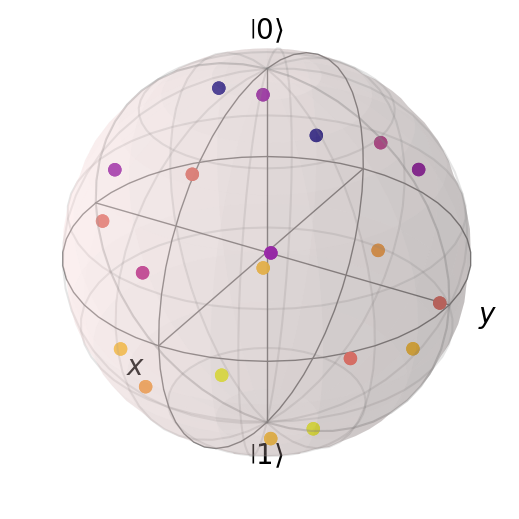

In [7]:
f1  = bloch_init_states(init_rhos, fid_distances)
f1.show()
bb1 = f1.fig
bb1.set_figwidth(5)
bb1.set_figheight(5)
bb1.savefig('Bloch3d_w_dodecahedron.pdf')

/tmp/ipykernel_14276/3508104874.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(palette)(val)[:,:3]


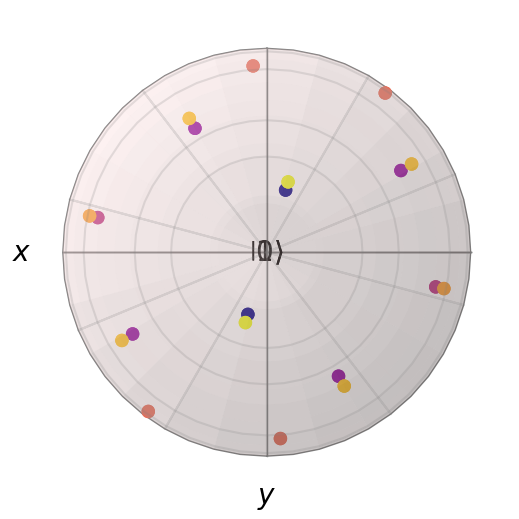

In [22]:
f2  = bloch_init_states(init_rhos, fid_distances, view = pole)
f2.show()
bb2 = f2.fig
#bb2.savefig('Bloch_pole.svg')

/tmp/ipykernel_14276/3508104874.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(palette)(val)[:,:3]


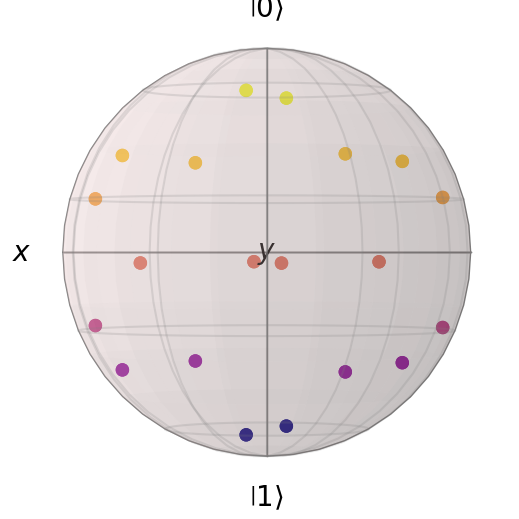

In [23]:
f3  = bloch_init_states(init_rhos, fid_distances, view = ecuator)
f3.show()
bb3 = f3.fig
#bb3.savefig('bloch_ecuatorY.svg')

/tmp/ipykernel_78107/3508104874.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(palette)(val)[:,:3]


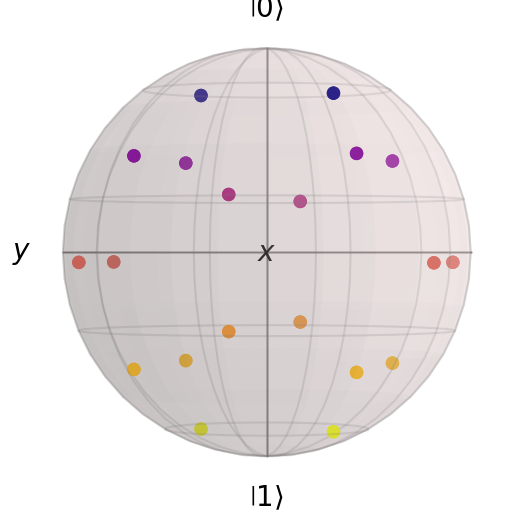

In [9]:
xecuator = [90,0]
f4  = bloch_init_states(init_rhos, fid_distances, view = xecuator)
f4.show()
bb4 = f4.fig
#bb4.savefig('bloch_ecuatorX.svg')

In [64]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

def plot_convex_hull(points):
    hull = ConvexHull(points)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot vertices
    ax.plot(points[:, 0], points[:, 1], points[:, 2], 'o')
    
    # Plot faces
    for simplex in hull.simplices:
        s = hull.points[simplex]
        s = np.vstack((s, s[0]))
        ax.plot(s[:, 0], s[:, 1], s[:, 2], "k-")
    #faces = Poly3DCollection([hull.points[simplex] for simplex in hull.simplices], alpha=0.5)
    #faces.set_facecolor('c')
    #ax.add_collection3d(faces)
    #ax.setxlims(-1,1)
    a=0.7
    ax.set_xlim((-a,a))
    ax.set_ylim((-a,a))
    ax.set_zlim((-a,a))
    ax.grid(False)
    ax.axis('off')
    return fig

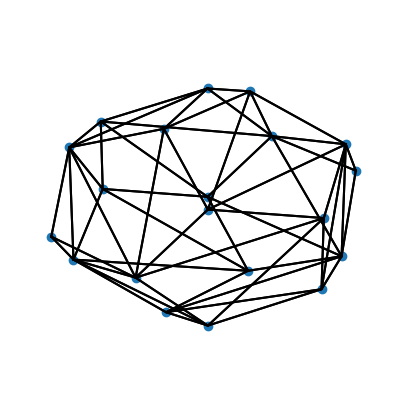

In [65]:
p = []
for i in range(20):
    xp, yp, zp = bloch_vector(init_rhos[i]).tolist()
    p.append([xp, yp, zp])
fig = plot_convex_hull(np.array(p))
fig.set_figwidth(5)
fig.set_figheight(5)
fig.savefig('Dodecahedron.pdf', bbox_inches='tight')